##### [Nguyễn Trọng Tuấn - 20176898](https://www.facebook.com/ISantaPo)

#### Câu 1:
\begin{align*}
X_1 \sim \beta(n_1,p_1) \implies P(X_1=k) = C_{n_1}^{k}p_1^k(1-p_1)^{n_1-k} \\
X_2 \sim \beta(n_2,p_2) \implies P(X_2=k) = C_{n_2}^{k}p_2^k(1-p_1)^{n_2-k}
\end{align*}

Có $Z = X_1 + X_2$ nên ta suy ra: 

\begin{align*}
P(Z=z) = \sum_{k=0}^{\infty}P(X_1=k)P(X_2=z-k)
\end{align*}

Trường hợp $z\leq 0$ dễ dàng thấy $P(Z=z)=0$
Trường hợp $z \geq n_1 + n_2$ dễ dàng thấy $P(Z=z)=0$  
Trường hợp $0<z\leq n_1+n_2$ thì $P(Z=z)=\sum_{k=0}^{\infty}C_{n_1}^{k}p_1^k(1-p_1)^{n_1-k}C_{n_2}^{z-k}p_1^{z-k}(1-p_2)^{n_2-z+k}$

#### Câu 2:  
\begin{align*}
X_1 \sim \textit{U}(0,1) \implies \textit{f}_{X_1} =
    \begin{cases}
    1 \quad if \space X \in [0,1] \\
    0 \quad ortherwise
    \end{cases} \\
X_2 \sim \textit{U}(0,2) \implies \textit{f}_{X_2} =
    \begin{cases}
    \frac{1}{2} \quad if \space X \in [0,2] \\
    0 \quad ortherwise
    \end{cases}
\end{align*}

Có $Z = X_1 + X_2$ nên ta suy ra: 

\begin{align*}
\textit{f}_Z(z) &=\int_{-\infty}^{+\infty} {f}_{X_1}(z-x){f}_{X_2}(x)dx \\
                &= 
    \begin{cases}
    \frac{1}{2}z \quad if \space z \in [0,1) \\
    \frac{1}{2} \quad if \space z \in [1,2) \\
    \frac{3}{2} - \frac{z}{2} \quad \space z \in [2,3] \\
    0 \quad ortherwise
    \end{cases}
\end{align*}

#### Câu 3:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal

In [21]:
uniformDist1 = stats.expon(0.01)
uniformDist2 = stats.expon(0.02)
delta = 1e-4
bigGrid = np.arange(-5,5,delta)

In [22]:
pdf1 = uniformDist1.pdf(bigGrid)
print("Integral over uniform pdf1: "+str(np.trapz(pdf1, bigGrid)))

Integral over uniform pdf1: 0.9931436557464691


In [23]:
pdf2 = uniformDist2.pdf(bigGrid)
print("Integral over uniform pdf2: "+str(np.trapz(pdf2, bigGrid)))

Integral over uniform pdf2: 0.9930752508410199


In [24]:
convPdf = signal.fftconvolve(pdf1,pdf2,'same')
print("Integral over convoluted pdf: "+str(np.trapz(convPdf, bigGrid)))

Integral over convoluted pdf: 9584.432028136349


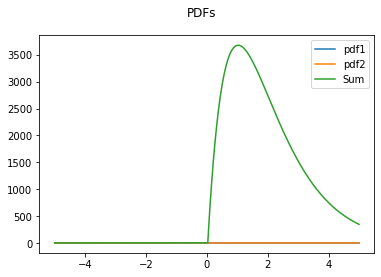

In [25]:
plt.plot(bigGrid,pdf1, label='pdf1')
plt.plot(bigGrid,pdf2, label='pdf2')
plt.plot(bigGrid,convPdf, label='Sum')
plt.legend(loc='best')
plt.suptitle('PDFs')
plt.show()